In [2]:
import pandas as pd

In [5]:
# df = pd.read_csv('annotation_map_final.csv')
# df.head()

https://docs.google.com/spreadsheets/d/1g6L9NVMpxGRellKzpeTUibOZbtDrVE_AXteVEbovVrQ/edit#gid=1045654625

In [6]:
def build_sheet_url(doc_id, sheet_id):
    return f'https://docs.google.com/spreadsheets/d/{doc_id}/export?format=csv&gid={sheet_id}'

def write_df_to_local(df, file_path):
    df.to_csv(file_path)

doc_id = '1g6L9NVMpxGRellKzpeTUibOZbtDrVE_AXteVEbovVrQ'
sheet_id = '1045654625'
sheet_url = build_sheet_url(doc_id, sheet_id)
df = pd.read_csv(sheet_url)
#write_df_to_local(df,local_path)

In [7]:
df.head()

,Unnamed: 0,index,context,ground_truth,predictions,is_relevant,Unnamed: 6
0,0,gandhi_1,"I congratulate you, my dear fellow. In this wo...",['In this world there are only two tragedies. ...,In this world there are only two tragedies,1,NaN
1,1,NaN,NaN,NaN,In this,0,NaN
2,2,NaN,NaN,NaN,In this world there are only two,0,NaN
3,3,NaN,NaN,NaN,In this world there are,0,NaN
4,4,NaN,NaN,NaN,In this world there are only,0,NaN


### I have followed the following link to implement mean average precision
- https://machinelearninginterview.com/topics/machine-learning/mapatk_evaluation_metric_for_ranking/
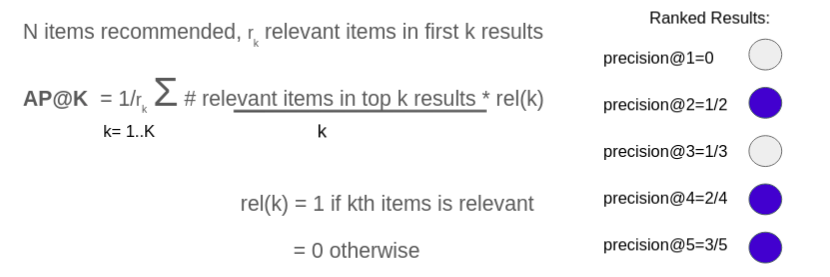


In [8]:
pred = {}
for i in range(5):
    pred[df['predictions'][i]] = df['is_relevant'][i]

In [9]:
pred = {'In this world there are only two tragedies': 0,
 'In this': 1,
 'In this world there are only two': 0,
 'In this world there are': 1,
 'In this world there are only': 1}

In [10]:
def mapk(predicted):
    score = 0
    num_hits = 0
    
    i = 1
    for k,v in predicted.items():
        if v == 1:
            num_hits += 1
        precision = (num_hits) / (i)
        #print(precision)
        score += precision*v
        i += 1
    if num_hits == 0: score = 0
    else: score = score/num_hits
    return score

In [11]:
mapk(pred)

0.5333333333333333

In [12]:
apk_list = []
i = 0
while i <len(df):
    pred = {}
    for j in range(5):
        pred[df['predictions'][i+j]] = df['is_relevant'][i+j]
    #print(pred)
    apk_list.append(mapk(pred))
    i += 5
    

In [13]:
len(apk_list)

526

In [14]:
map_5 = sum(apk_list)/len(apk_list)
print(map_5)

0.6625528094634546
